In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('diabetes.csv') 

In [3]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    data[col] = data[col].replace(0, data[col].median())

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Outcome']))
data_scaled = pd.DataFrame(scaled_data, columns=data.columns[:-1])
data_scaled['Outcome'] = data['Outcome']

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    32.450911    0.471876   33.240885    0.348958  
std      6.875366    0.331329   11.760232    0.476951  
min     18.200000    0.078000   21.000000    0.000000  
25%     27.500000    0.243750   24.

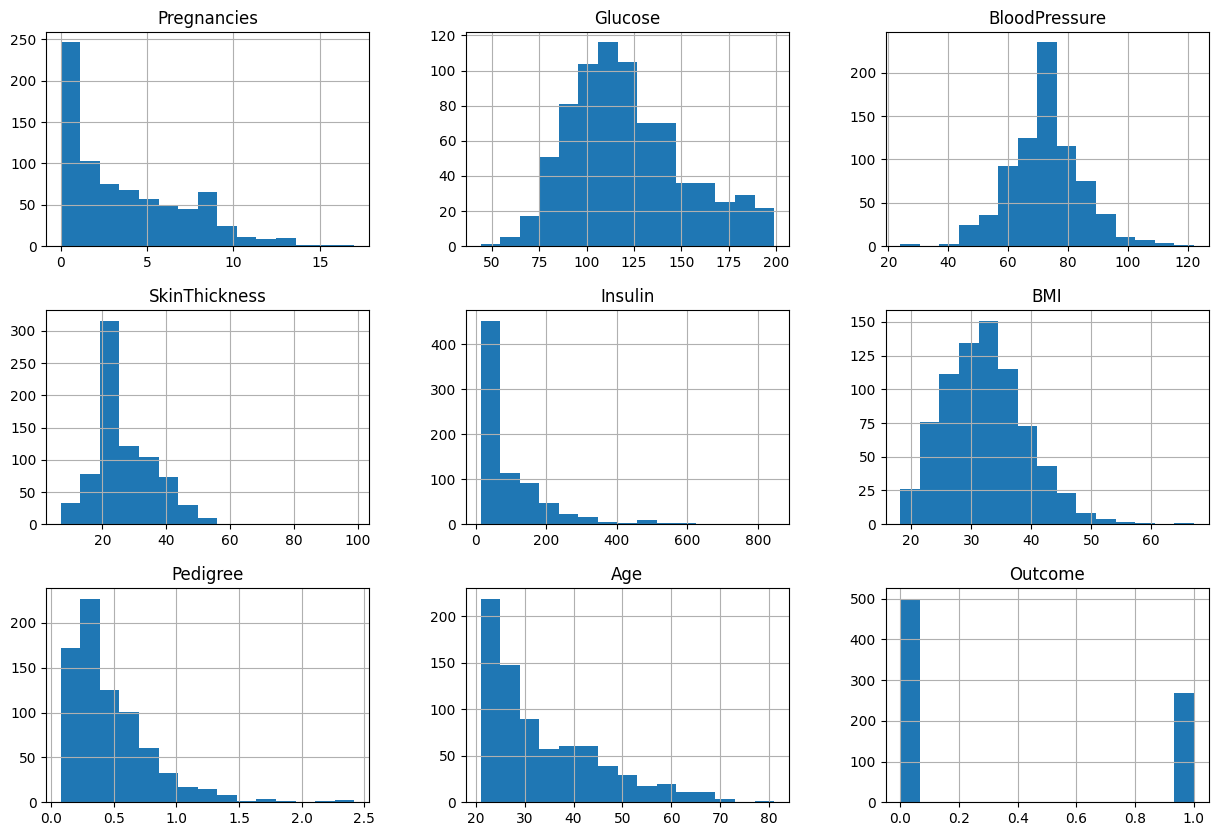

In [5]:
print(data.describe())
data.hist(bins=15, figsize=(15, 10))
plt.show()

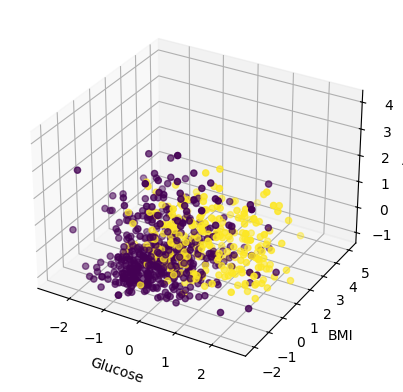

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled['Glucose'], data_scaled['BMI'], data_scaled['Age'], c=data_scaled['Outcome'])
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
plt.show()

In [8]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        predictions.append(np.bincount(k_nearest_labels).argmax())
    return predictions

In [10]:
X = data_scaled.drop(columns=['Outcome'])
y = data_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

random_features = np.random.choice(X.columns, size=5, replace=False)
X_train_random = X_train[random_features]
X_test_random = X_test[random_features]

fixed_features = ['Glucose', 'BMI', 'Age']
X_train_fixed = X_train[fixed_features]
X_test_fixed = X_test[fixed_features]

In [2]:
k_values = [3, 5, 10]
for k in k_values:
    print(f"\nEvaluating Model 1 with k={k}")
    y_pred_random = knn_predict(X_train_random.values, y_train.values, X_test_random.values, k)
    cm_random = confusion_matrix(y_test, y_pred_random)
    print("Confusion Matrix (Random Features):\n", cm_random)

    print(f"\nEvaluating Model 2 with k={k}")
    y_pred_fixed = knn_predict(X_train_fixed.values, y_train.values, X_test_fixed.values, k)
    cm_fixed = confusion_matrix(y_test, y_pred_fixed)
    print("Confusion Matrix (Fixed Features):\n", cm_fixed)


Evaluating Model 1 with k=3


NameError: name 'knn_predict' is not defined